<a href="https://colab.research.google.com/github/ashikKN/DailyTask_USL_ICT_KMeans-AgglomerativeClustering/blob/main/DailyTask_USL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import neccessary libraries**

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

**load the data**

In [5]:
data = pd.read_csv('/content/fish.csv', header=None)

In [6]:
data

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [7]:
data1 = data.copy()

In [8]:
data1

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


**scatter plot before performing KMeans Clustering**

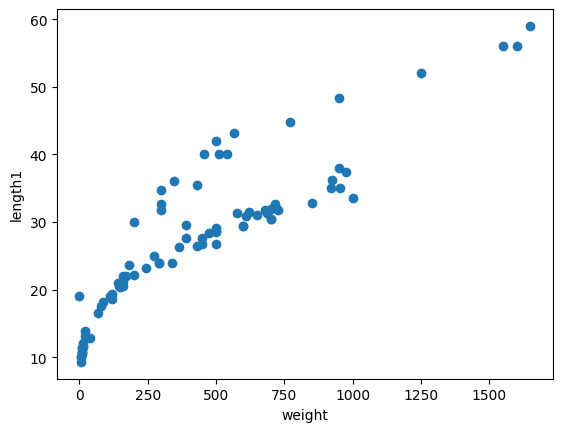

In [9]:
plt.scatter(data1[1],data1[2])
plt.xlabel('weight')
plt.ylabel('length1')
plt.show()

**Finding the optimum number of clusters**

In [10]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(data1[[1]],data[[2]])
  # sum of squared error
  sse.append(km.inertia_)

In [11]:
sse

[12189297.405882355,
 4442019.305,
 1933031.0876373628,
 1012891.2818181816,
 514090.7767418429,
 326707.7596889953,
 253907.51758520384,
 130081.342874231,
 89974.0881733763]

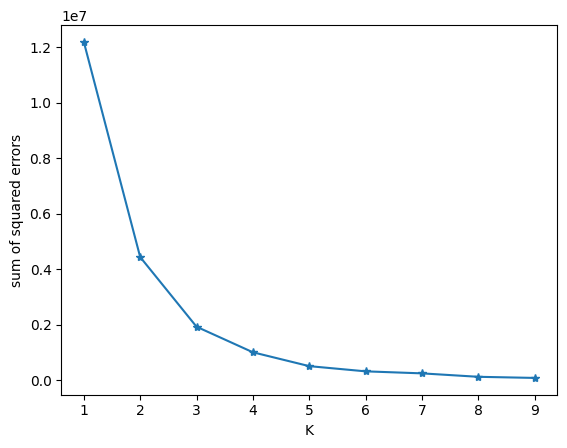

In [12]:
plt.xlabel('K')
plt.ylabel('sum of squared errors')
plt.plot(k_rng,sse,marker='*')
plt.show()

In [13]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [14]:
y_predicted = km.fit_predict(data1[[1]],data1[[2]])
y_predicted

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2],
      dtype=int32)

In [15]:
data1['cluster']=y_predicted
data1.head()

,0,1,2,3,4,5,6,cluster
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4,3
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8,1
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1,1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3,1
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1,1


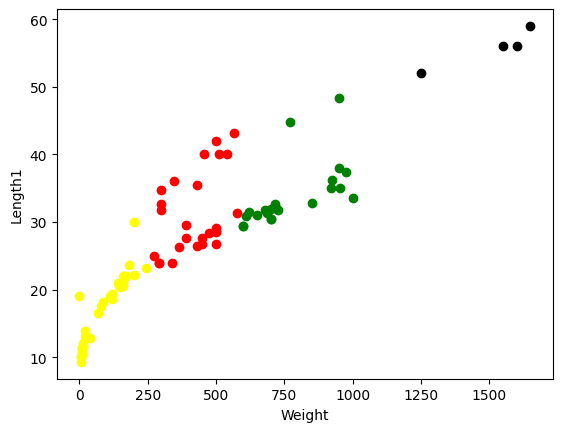

In [16]:
data2=data1[data1.cluster==0]
data3=data1[data1.cluster==1]
data4=data1[data1.cluster==2]
data5=data1[data1.cluster==3]

plt.scatter(data2[1],data2[2],color='green')
plt.scatter(data3[1],data3[2],color='red')
plt.scatter(data4[1],data4[2],color='black')
plt.scatter(data5[1],data5[2],color='yellow')

plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

**MinMaxScaler**

In [17]:
scaler = MinMaxScaler()
scaler.fit(data1[[1]])
data1[1]=scaler.transform(data1[[1]])
data1

scaler.fit(data1[[2]])
data1[2]=scaler.transform(data1[[2]])
data1

,0,1,2,3,4,5,6,cluster
0,Bream,0.146667,0.279678,25.4,30.0,38.4,13.4,3
1,Bream,0.175758,0.295775,26.3,31.2,40.0,13.8,1
2,Bream,0.206061,0.293763,26.5,31.1,39.8,15.1,1
3,Bream,0.220000,0.342052,29.0,33.5,38.0,13.3,1
4,Bream,0.260606,0.346076,29.0,34.0,36.6,15.1,1
...,...,...,...,...,...,...,...,...
80,Pike,0.575758,0.784708,51.7,55.1,16.2,11.2,0
81,Pike,0.757576,0.859155,56.0,59.7,17.9,11.7,2
82,Pike,0.969697,0.939638,60.0,64.0,15.0,9.6,2
83,Pike,0.939394,0.939638,60.0,64.0,15.0,9.6,2


In [18]:
# train scaled dataset
km = KMeans(n_clusters=4)
y_predicted=km.fit_predict(data1[[1,2]])
y_predicted

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 3],
      dtype=int32)

In [19]:
data1['cluster']=y_predicted
data1

,0,1,2,3,4,5,6,cluster
0,Bream,0.146667,0.279678,25.4,30.0,38.4,13.4,2
1,Bream,0.175758,0.295775,26.3,31.2,40.0,13.8,0
2,Bream,0.206061,0.293763,26.5,31.1,39.8,15.1,0
3,Bream,0.220000,0.342052,29.0,33.5,38.0,13.3,0
4,Bream,0.260606,0.346076,29.0,34.0,36.6,15.1,0
...,...,...,...,...,...,...,...,...
80,Pike,0.575758,0.784708,51.7,55.1,16.2,11.2,1
81,Pike,0.757576,0.859155,56.0,59.7,17.9,11.7,3
82,Pike,0.969697,0.939638,60.0,64.0,15.0,9.6,3
83,Pike,0.939394,0.939638,60.0,64.0,15.0,9.6,3


**centroids - cluster 1 to 4**

In [20]:
km.cluster_centers_

array([[0.2999223 , 0.43269876],
       [0.53709091, 0.58591549],
       [0.04711174, 0.13682093],
       [0.91666667, 0.93460765]])

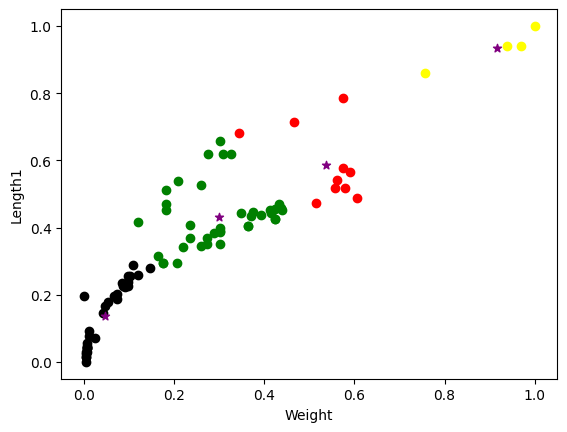

In [21]:
data2=data1[data1.cluster==0]
data3=data1[data1.cluster==1]
data4=data1[data1.cluster==2]
data5=data1[data1.cluster==3]

plt.scatter(data2[1],data2[2],color='green')
plt.scatter(data3[1],data3[2],color='red')
plt.scatter(data4[1],data4[2],color='black')
plt.scatter(data5[1],data5[2],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

# **Agglomerative Hierarchical Clustering**

In [22]:
model = AgglomerativeClustering()
model.fit(data1[[1]],data1[[2]])
pred = model.fit_predict(data1[[1]],data1[[2]])

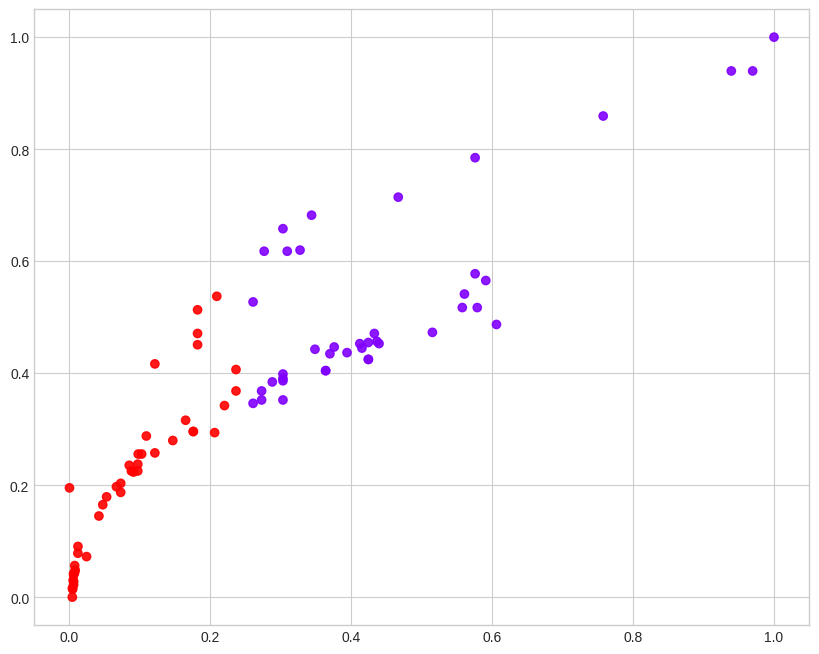

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(data1[1],data1[2],c=pred,cmap='rainbow',alpha=0.9)
plt.show()